# Hacking with Fred day

## Goal
* Step 1: Detect 'objects' (for example: your cellphone) -> object detection from sendung mit der Maus

* Step 2: Show the last image of the object with a bounding box around the object. -> AWS Lambda function with S3 image storage. 


* Bonus step: augmented reality location retrieval. 

In [6]:
from PIL import Image
from imageai.Detection import ObjectDetection
import os
import cv2
import datetime



## Step 1: load the model

In [7]:

execution_path = os.getcwd()
model_path = os.path.join(execution_path, "yolo.h5")

if not os.path.exists(model_path):
    print("ERROR! Download the model from here: https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5")
    exit(-1)


# Create the object detection network
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.loadModel(detection_speed="faster")



## Step 2: get an image and detect object in this image

In [17]:

frame_bgr = cv2.imread("image2.jpg")
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.resize(frame_rgb, dsize=(640, 480))

output_image_rgb, detections = detector.detectObjectsFromImage(input_image=frame_rgb, input_type='array', output_type='array')
output_image_bgr = cv2.cvtColor(output_image_rgb, cv2.COLOR_RGB2BGR)

for eachObject in detections: 
    print(eachObject["name"], eachObject["percentage_probability"])
h,w,c = output_image_bgr.shape

teddy bear 58.8115394115448
book 72.0728874206543
laptop 97.95739650726318


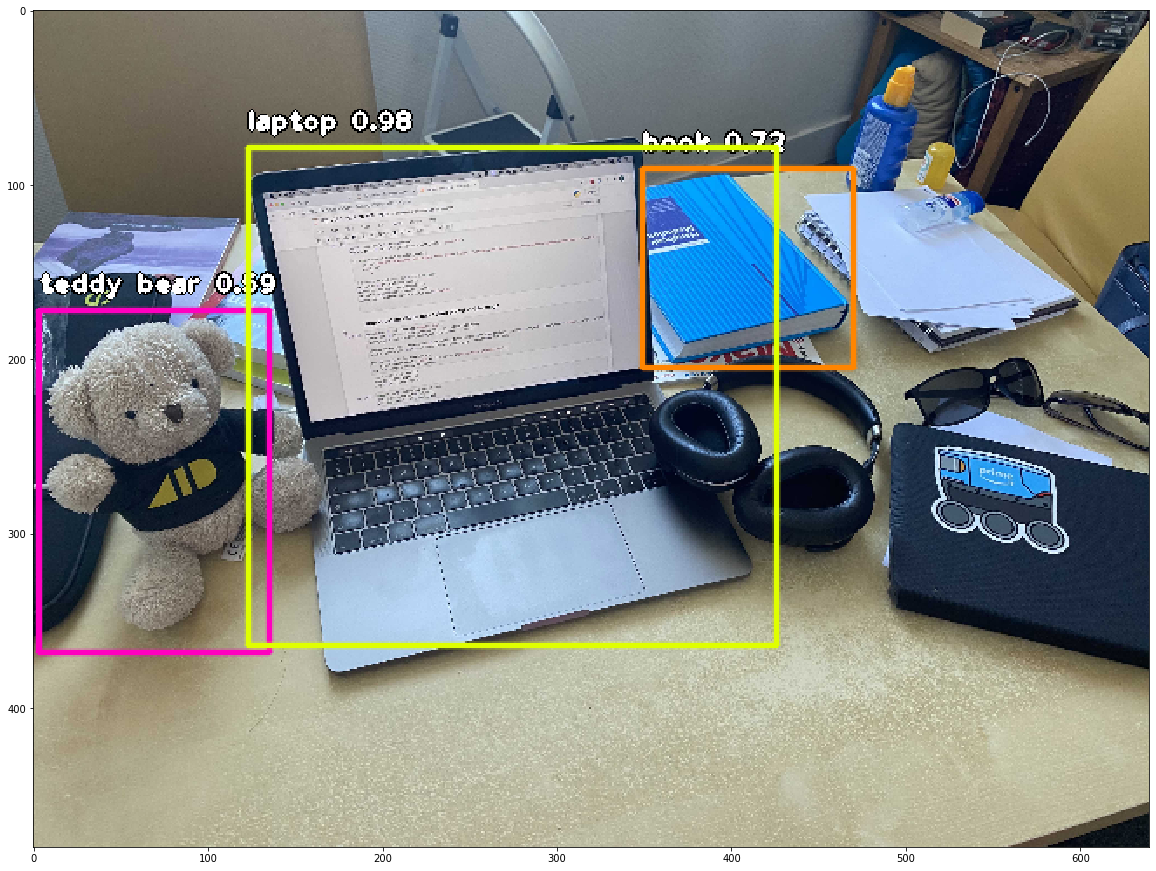

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(output_image_rgb)

In [14]:
detections

[{'name': 'cup',
  'percentage_probability': 57.13750720024109,
  'box_points': [175, 57, 263, 137]},
 {'name': 'cup',
  'percentage_probability': 99.22648668289185,
  'box_points': [219, 124, 387, 328]},
 {'name': 'cup',
  'percentage_probability': 99.77595210075378,
  'box_points': [60, 148, 238, 362]}]